### Comparing images using ORB/SIFT feature detectors and structural similarity index
[source](https://www.youtube.com/watch?v=16s3Pi1InPU)

In [1]:
from skimage.metrics import structural_similarity
import cv2

In [2]:
# Works well with images of different dimensions
def orb_sim(img1, img2):
    orb = cv2.ORB_create()
    kp_a, desc_a = orb.detectAndCompute(img1, None)
    kp_b, desc_b = orb.detectAndCompute(img2, None)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(desc_a, desc_b)
    # Look for similar regions with distance < 50. 
    similar_regions = [i for i in matches if i.distance < 50]
    if len(matches) == 0:
        return 0
    return len(similar_regions) / len(matches)

In [93]:
# Needs images to be same dimensions
def structural_similarity(img1, img2):
    similarity, difference = structural_similarity(img1, img2, data_)
    return similarity

img00 = cv2.imread("../data/00_image/PTS01_PPL.png")
img01 = cv2.imread("../data/00_image/PTS01_XPL.png")

In [89]:
# Reading image using opencv
# img00 = cv2.imread("../data/00_image/granite_1mm.jpeg", 0)
# img01 = cv2.imread("../data/00_image/diorite_1mm.jpeg", 0)

pts_ppl = cv2.imread("../data/00_image/PTS01_XPL.png")
pts_xpl = cv2.imread("../data/00_image/PTS01_PPL.png")

# Displaying images using opencv
# cv2.imshow("First Image", img00)
# cv2.imshow("Second Image", img01)
cv2.imshow("PTS PPL", pts_ppl)
cv2.imshow("PTS XPL", pts_xpl)
# This will prevent the notebook cell from hanging - JUST PRESS ESC key!
cv2.waitKey(0)
cv2.destroyAllWindows()

# This function prevents jupyter notebook from crashing/hanging while showing the images.
# while(True):
#     k = cv2.waitKey(33)
#     if k == -1:  # if no key was pressed, -1 is returned
#         continue
#     else:
#         break
# cv2.destroyWindow()

In [ ]:
# Reading and opening the images using matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as img
%matplotlib inline

img1_img = img.imread("../data/00_image/granite_1mm.jpeg")
img2_img = img.imread("../data/00_image/diorite_1mm.jpeg")

img1_plt = plt.imread("../data/00_image/granite_1mm.jpeg")
img2_plt = plt.imread("../data/00_image/diorite_1mm.jpeg")

fig, axs = plt.subplots(1,2, figsize=(10,3))
fig.set_facecolor("gray")

axs[0].imshow(img1_img)
axs[1].imshow(img2_img)

axs[0].axis("off"), axs[1].axis("off")

# plt.imshow(img2_plt)

In [90]:
pts_ppl.shape, pts_ppl.shape

((312, 414, 3), (312, 414, 3))

In [88]:
orb_similarity = orb_sim(pts_ppl, pts_xpl)
print("Similarity using ORB is: " , orb_similarity)

Similarity using ORB is:  1.0


In [13]:
# Resize for SSIM
from skimage.transform import resize

In [96]:
ssim = structural_similarity(img00, img00, full=True)
print("Using SSIM: ", ssim)

TypeError: structural_similarity() got an unexpected keyword argument 'full'

### USING SKIMAGE - STRUCTURAL_SIMILARITY() FUNCTION
[source](https://scikit-image.org/docs/stable/auto_examples/transform/plot_ssim.html)

In [24]:
from skimage import data, img_as_float
import numpy as np

In [55]:
img = img_as_float(data.camera())
rows, cols = img.shape
noise = np.ones_like(img) * 0.2 * (img.max() -img.min())

(512, 512)

In [33]:
rng = np.random.default_rng()
noise[rng.random(size=noise.shape) > 0.5] *= -1

In [39]:
img_noise = img + noise
img_const = img + abs(noise)

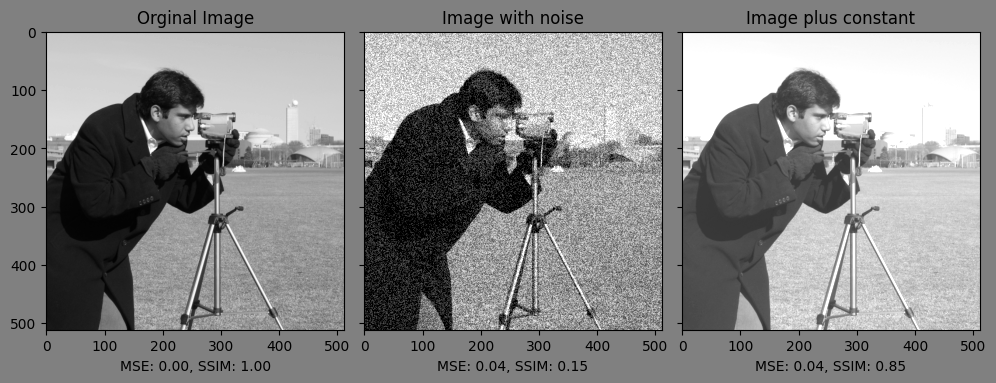

In [97]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(10,4), sharex=True, sharey=True)
ax = axes.ravel()
fig.set_facecolor("gray")

mse_none = mean_squared_error(img, img)
ssim_none = ssim(img, img, data_range = img.max() - img.min())

mse_noise = mean_squared_error(img, img_noise)
ssim_noise = ssim(img, img_noise, data_range=img_noise.max() - img_noise.min())

mse_const = mean_squared_error(img, img_const)
ssim_const = ssim(img, img_const, data_range = img_const.max() - img_const.min())

ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(f'MSE: {mse_none:.2f}, SSIM: {ssim_none:.2f}')
ax[0].set_title('Orginal Image')

ax[1].imshow(img_noise, cmap="gray", vmin=0, vmax=1)
ax[1].set_xlabel(f'MSE: {mse_noise:.2f}, SSIM: {ssim_noise:.2f}')
ax[1].set_title("Image with noise")

ax[2].imshow(img_const, cmap="gray", vmin=0, vmax=1)
ax[2].set_xlabel(f'MSE: {mse_const:.2f}, SSIM: {ssim_const:.2f}')
ax[2].set_title("Image plus constant")

plt.tight_layout()
plt.show()

In [99]:
n = (1.0 - 0.04)*100
n

96.0

### Other ways of SSIM and MSE
[source](https://code.adonline.id.au/structural-similarity-index-ssim-in-python/#:~:text=The%20SSIM%20values%20range%20between,original%20image%20and%20the%20copy.&text=The%20code%20takes%20two%20inputs,comparison%20(copy%20or%20degraded)%20image)

In [2]:
# Import libraries
from skimage.metrics import structural_similarity as ssim
import numpy as np
import cv2
import argparse

In [3]:
def options():
 parser = argparse.ArgumentParser(description="Read image metadata")
 parser.add_argument("-o", "--first", help="Input image file.", required=True)
 parser.add_argument("-c", "--second", help="Input image file.", required=True)
 args = parser.parse_args()
 return args

In [4]:
def mse(imageA, imageB):
 # the 'Mean Squared Error' between the two images is the sum of the squared difference between the two images
 mse_error = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
 mse_error /= float(imageA.shape[0] * imageA.shape[1])
	
 # return the MSE. The lower the error, the more "similar" the two images are.
 return mse_error

In [5]:
def compare(imageA, imageB):
 # Calculate the MSE and SSIM
 m = mse(imageA, imageB)
 s = ssim(imageA, imageB)

 # Return the SSIM. The higher the value, the more "similar" the two images are.
 return s

In [15]:
def main(): 
    # Get options
    args = options()
    
    # Import images
    image1 = cv2.imread(args.first)
    image2 = cv2.imread(args.second, 1)
    
    # Convert the images to grayscale
    # gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    # gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    
    # Check for same size and ratio and report accordingly
    ho, wo, _ = image1.shape
    hc, wc, _ = image2.shape
    ratio_orig = ho/wo
    ratio_comp = hc/wc
    dim = (wc, hc)

    if round(ratio_orig, 2) != round(ratio_comp, 2):
        print("\nImages not of the same dimension. Check input.")
        exit()
    
    # Resize first image if the second image is smaller
    elif ho > hc and wo > wc:
        print("\nResizing original image for analysis...")
        gray1 = cv2.resize(gray1, dim)
    
    elif ho < hc and wo < wc:
        print("\nCompressed image has a larger dimension than the original. Check input.")
        exit()
    
    if round(ratio_orig, 2) == round(ratio_comp, 2):
        gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
        gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
        mse_value = mse(gray1, gray2)
        ssim_value = compare(gray1, gray2)
        print("MSE:", mse_value)
        print("SSIM:", ssim_value)
     
if __name__ == '__main__':
         main()

usage: ipykernel_launcher.py [-h] -o FIRST -c SECOND
ipykernel_launcher.py: error: the following arguments are required: -o/--first, -c/--second


SystemExit: 2

/home/rolito/Desktop/DevelopmentOfAnalyticalModel_PTS_Analysis/rvenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


#### Manually testing the codes above

In [6]:
image1 = cv2.imread("../data/00_image/PTS01_PPL.png")
image2 = cv2.imread("../data/00_image/PTS01_PPL_resized.png", 1)

In [7]:
# Changing an image by..
print(f"Orginal Image size: {image1.shape}")

image1_res = cv2.resize(image1, (300, 415))
cv2.imwrite('../data/00_image/PTS01_PPL_resized.png', image1_res)
image1_r = cv2.imread("../data/00_image/PTS01_PPL_resized.png")
print(f"Resized Original Image: {image1_r.shape}")

Orginal Image size: (310, 415, 3)
Resized Original Image: (415, 300, 3)


In [8]:
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [159]:
# cv2.imshow("Image 1", image1)
# cv2.imshow("Image 2", image2)

cv2.imshow("Image 1", gray1)
cv2.imshow("Image 2", gray2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [160]:
ho, wo, _ = image1.shape
hc, wc, _ = image2.shape
ratio_orig = ho/wo
ratio_comp = hc/wc
dim = (wc, hc)
# dim
# print(ratio_orig, ratio_comp)

if round(ratio_orig, 2) != round(ratio_comp, 2):
    print("\nIMage are not same dimensions. Check input")
    exit()
elif ho > hc and wo > wc:
    print("\nResizing original image for analysis....")
    gray1 = cv2.resize(gray1, dim)
elif ho < hc and wo < wc:
    print("\nCompressed image has a larger dimension that the original. Check input.")



IMage are not same dimensions. Check input


In [10]:
gray1.shape, gray2.shape

((310, 415), (415, 300))

# TRANSIENT TEST AREA!!!

In [27]:
from glob import glob
import matplotlib.pyplot as plt

image_folder = r'../data/00_image/'
img = glob(image_folder + "*.*")

In [41]:
img_cv2 = cv2.imread(img[1])

In [40]:
img_plt = plt.imread(img[1])

In [42]:
img_plt.shape, img_cv2.shape

((312, 414, 4), (312, 414, 3))

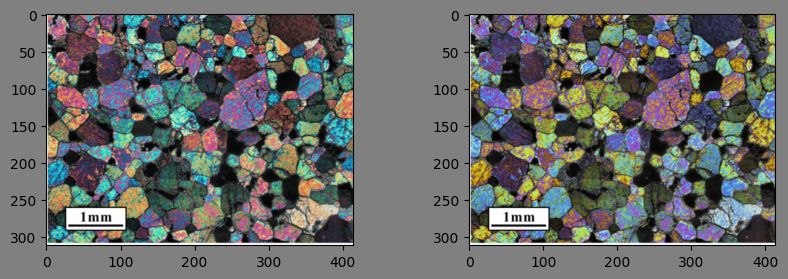

In [43]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
fig.set_facecolor("gray")

axs[0].imshow(img_plt)
axs[1].imshow(img_cv2)